## 0. Load Required Libraries

In [1]:
# !pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import src.util as util
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## 1. Import Configuration File

In [197]:
config_data = util.load_config()



## 2. Load Dataset

In [198]:
def load_dataset(config_data: dict) -> pd.DataFrame:
    # Load every set of data
    x_train = util.pickle_load(config_data["train_set_path"][0])
    y_train = util.pickle_load(config_data["train_set_path"][1])

    x_valid = util.pickle_load(config_data["valid_set_path"][0])
    y_valid = util.pickle_load(config_data["valid_set_path"][1])

    x_test = util.pickle_load(config_data["test_set_path"][0])
    y_test = util.pickle_load(config_data["test_set_path"][1])

    # Concatenate x and y each set
    train_set = pd.concat([x_train, y_train], axis = 1)
    valid_set = pd.concat([x_valid, y_valid], axis = 1)
    test_set = pd.concat([x_test, y_test], axis = 1)

    # Return 3 set of data
    return train_set, valid_set, test_set

In [199]:
train_set, valid_set, test_set = load_dataset(config_data)

## 3. Join Categories

In [6]:
def join_label_categori(set_data, config_data):
    # Check if label not found in set data
    if config_data["label"] in set_data.columns.to_list():
        # Create copy of set data
        set_data = set_data.copy()
        return set_data
    else:
        raise RuntimeError("Kolom label tidak terdeteksi pada set data yang diberikan!")

### 3.1. Train Set

In [7]:
train_set.NPL.value_counts()

NPL
Tidak    5678
Ya        774
Name: count, dtype: int64

In [8]:
train_set

,monthly_income,housing_type,num_of_dependent,lama_bekerja,otr,status_pernikahan,pekerjaan,tenor,dp,monthly_income_log,num_of_dependent_log,lama_bekerja_log,NPL
5841,36968970,milik sendiri,1,0,5000000000,Nikah,Karyawan Swasta,36,1641200000,17.425589,0.693147,0.000000,Tidak
8881,61150000,milik orang tua,0,1,1000000000,Belum Nikah,Profesional,12,0,17.928840,0.000000,0.693147,Tidak
6470,46926970,milik sendiri,0,0,8000000000,Nikah,Karyawan Swasta,60,80000000,17.664103,0.000000,0.000000,Tidak
3976,30461540,milik sendiri,0,0,4000000000,Nikah,Wiraswasta,36,4000000000,17.231975,0.000000,0.000000,Ya
8091,36500000,milik sendiri,0,0,4500000000,Nikah,Profesional,36,2023200000,17.412823,0.000000,0.000000,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,36511140,milik orang tua,4,0,1000000000,Nikah,Profesional,12,0,17.413128,1.609438,0.000000,Tidak
2396,50424000,milik sendiri,0,0,6000000000,Belum Nikah,Wiraswasta,48,336000000,17.735978,0.000000,0.000000,Tidak
316,44968410,milik sendiri,0,1,3000000000,Nikah,Wiraswasta,24,1512000000,17.621471,0.000000,0.693147,Tidak
6214,41451900,milik sendiri,1,0,2500000000,Nikah,Profesional,24,1261600000,17.540044,0.693147,0.000000,Tidak


In [9]:
train_set = join_label_categori(train_set, config_data)

In [10]:
train_set.NPL.value_counts()

NPL
Tidak    5678
Ya        774
Name: count, dtype: int64

### 3.2. Valid Set

In [11]:
valid_set.NPL.value_counts()

NPL
Tidak    1217
Ya        166
Name: count, dtype: int64

In [12]:
valid_set = join_label_categori(valid_set, config_data)

In [13]:
valid_set.NPL.value_counts()

NPL
Tidak    1217
Ya        166
Name: count, dtype: int64

### 3.3. Test Set

In [14]:
test_set.NPL.value_counts()

NPL
Tidak    1217
Ya        166
Name: count, dtype: int64

In [15]:
test_set = join_label_categori(test_set, config_data)

In [16]:
test_set.NPL.value_counts()

NPL
Tidak    1217
Ya        166
Name: count, dtype: int64

## 4. Delete columns_being_logtransformed

In [17]:
#function for delecting columns_being_logtransformed
def delete_columns_being_logtransformed(set_data):
    result = set_data.drop(config_data['columns_being_logtransformed'],axis=1)
    return result

### 4.1. Delete columns_being_logtransformed in train_set

In [18]:
train_set = delete_columns_being_logtransformed(train_set)
train_set

,housing_type,otr,status_pernikahan,pekerjaan,tenor,dp,monthly_income_log,num_of_dependent_log,lama_bekerja_log,NPL
5841,milik sendiri,5000000000,Nikah,Karyawan Swasta,36,1641200000,17.425589,0.693147,0.000000,Tidak
8881,milik orang tua,1000000000,Belum Nikah,Profesional,12,0,17.928840,0.000000,0.693147,Tidak
6470,milik sendiri,8000000000,Nikah,Karyawan Swasta,60,80000000,17.664103,0.000000,0.000000,Tidak
3976,milik sendiri,4000000000,Nikah,Wiraswasta,36,4000000000,17.231975,0.000000,0.000000,Ya
8091,milik sendiri,4500000000,Nikah,Profesional,36,2023200000,17.412823,0.000000,0.000000,Tidak
...,...,...,...,...,...,...,...,...,...,...
8813,milik orang tua,1000000000,Nikah,Profesional,12,0,17.413128,1.609438,0.000000,Tidak
2396,milik sendiri,6000000000,Belum Nikah,Wiraswasta,48,336000000,17.735978,0.000000,0.000000,Tidak
316,milik sendiri,3000000000,Nikah,Wiraswasta,24,1512000000,17.621471,0.000000,0.693147,Tidak
6214,milik sendiri,2500000000,Nikah,Profesional,24,1261600000,17.540044,0.693147,0.000000,Tidak


### 4.2. Delete columns_being_logtransformed in valid_set

In [19]:
valid_set = delete_columns_being_logtransformed(valid_set)
valid_set

,housing_type,otr,status_pernikahan,pekerjaan,tenor,dp,monthly_income_log,num_of_dependent_log,lama_bekerja_log,NPL
7064,milik sendiri,5000000000,Belum Nikah,Wiraswasta,36,2534000000,17.532741,0.000000,0.000000,Tidak
8962,milik sendiri,1000000000,Nikah,Profesional,12,0,17.553180,0.000000,0.000000,Tidak
7613,milik sendiri,3000000000,Belum Nikah,Profesional,24,3000000000,17.421432,0.000000,0.000000,Ya
7671,milik orang tua,6000000000,Nikah,Wiraswasta,48,6000000000,17.939414,0.000000,0.000000,Ya
8265,milik sendiri,3000000000,Belum Nikah,Profesional,24,3000000000,17.654855,0.000000,0.000000,Ya
...,...,...,...,...,...,...,...,...,...,...
6856,milik sendiri,7500000000,Nikah,Karyawan Swasta,60,2130000000,17.508240,1.945910,0.000000,Tidak
6444,kos,7000000000,Nikah,Profesional,48,4024000000,17.399030,0.000000,0.000000,Tidak
6292,milik sendiri,5000000000,Nikah,Profesional,36,5000000000,17.412275,0.000000,0.000000,Ya
2953,milik sendiri,8000000000,Belum Nikah,Profesional,60,3332000000,18.191268,0.693147,0.693147,Tidak


### 4.1. Delete columns_being_logtransformed in test_set

In [20]:
test_set = delete_columns_being_logtransformed(test_set)
test_set

,housing_type,otr,status_pernikahan,pekerjaan,tenor,dp,monthly_income_log,num_of_dependent_log,lama_bekerja_log,NPL
361,kontrak,8000000000,Belum Nikah,Wiraswasta,60,1802000000,18.301390,0.693147,0.000000,Tidak
2316,milik pasangan,6000000000,Nikah,Profesional,48,1824000000,17.399030,3.258097,0.000000,Tidak
848,milik pasangan,8000000000,Nikah,Profesional,60,3332000000,17.625840,0.000000,0.000000,Tidak
5417,milik sendiri,2000000000,Nikah,Wiraswasta,12,1504400000,17.412823,0.693147,0.000000,Tidak
6445,kos,7000000000,Nikah,Profesional,48,4024000000,17.399030,0.000000,0.000000,Tidak
...,...,...,...,...,...,...,...,...,...,...
7721,milik sendiri,4000000000,Belum Nikah,Karyawan Swasta,36,1026400000,17.727534,0.693147,0.000000,Tidak
7911,milik sendiri,6000000000,Nikah,Profesional,48,2697600000,17.479072,0.000000,0.693147,Tidak
6766,milik orang tua,6000000000,Nikah,Wiraswasta,48,336000000,17.966734,0.000000,1.098612,Tidak
2134,kos,5000000000,Nikah,Wiraswasta,36,5000000000,17.461407,0.693147,0.000000,Ya


## 5. Encoding NPL

### 5.1. Fit OHE to Categorical Data

In [21]:
def ohe_fit(data_tobe_fitted: dict, ohe_path: str) -> OneHotEncoder:
    # Create ohe object
    ohe = OneHotEncoder(sparse = False)

    # Fit ohe
    ohe.fit(np.array(data_tobe_fitted).reshape(-1, 1))

    # Save ohe object
    util.pickle_dump(ohe, f'{ohe_path}.pkl')

    # Return trained ohe
    return ohe

ohe_path = config_data["ohe_path"]
ohe_fit(config_data["range_housing_type"], f"{ohe_path}/ohe_housing_type")
ohe_fit(config_data["range_status_pernikahan"], f"{ohe_path}/ohe_status_pernikahan")
ohe_fit(config_data["range_pekerjaan"], f"{ohe_path}/ohe_pekerjaan")


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [22]:
def ohe_transform(set_data: pd.DataFrame, tranformed_column: str, ohe_path: str) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    ohe_path = f"{ohe_path}/ohe_{tranformed_column}.pkl"

    # Load ohe categorical
    ohe_statiun = util.pickle_load(ohe_path)

    # Transform variable categorical of set data, resulting array
    categorical_features = ohe_statiun.transform(np.array(set_data[tranformed_column].to_list()).reshape(-1, 1))

    # Convert to dataframe
    categorical_features = pd.DataFrame(categorical_features.tolist(), columns = list(ohe_statiun.categories_[0]))

    # Set index by original set data index
    categorical_features.set_index(set_data.index, inplace = True)

    # Concatenate new features with original set data
    set_data = pd.concat([categorical_features, set_data], axis = 1)

    # Drop categorical column
    set_data.drop(columns = tranformed_column, inplace = True)

    # Convert columns type to string
    new_col = [str(col_name) for col_name in set_data.columns.to_list()]
    set_data.columns = new_col

    # Return new feature engineered set data
    return set_data

def ohe_transform_all(set_data):
    result = ohe_transform(set_data, "housing_type", config_data["ohe_path"])
    result = ohe_transform(result, "status_pernikahan", config_data["ohe_path"])
    result = ohe_transform(result, "pekerjaan", config_data["ohe_path"])
    return result

### 5.2. Train Set

In [23]:
train_set = ohe_transform_all(train_set)

### 5.3. Valid Set

In [24]:
valid_set = ohe_transform_all(valid_set)

### 5.4. Test Set

In [25]:
test_set = ohe_transform_all(test_set)

In [196]:
test_set

,Buruh,Ibu Rumah Tangga/Pensiunan/Mahasiswa/Lainnya,Karyawan Swasta,PNS,Profesional,Wiraswasta,Belum Nikah,Nikah,kontrak,kos,milik orang tua,milik pasangan,milik sendiri,otr,tenor,dp,monthly_income_log,num_of_dependent_log,lama_bekerja_log,NPL
361,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8000000000,60,1802000000,18.301390,0.693147,0.000000,Tidak
2316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6000000000,48,1824000000,17.399030,3.258097,0.000000,Tidak
848,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8000000000,60,3332000000,17.625840,0.000000,0.000000,Tidak
5417,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2000000000,12,1504400000,17.412823,0.693147,0.000000,Tidak
6445,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7000000000,48,4024000000,17.399030,0.000000,0.000000,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7721,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4000000000,36,1026400000,17.727534,0.693147,0.000000,Tidak
7911,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6000000000,48,2697600000,17.479072,0.000000,0.693147,Tidak
6766,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6000000000,48,336000000,17.966734,0.000000,1.098612,Tidak
2134,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5000000000,36,5000000000,17.461407,0.693147,0.000000,Ya


## 6. Balancing Label

<Axes: xlabel='NPL', ylabel='Count'>

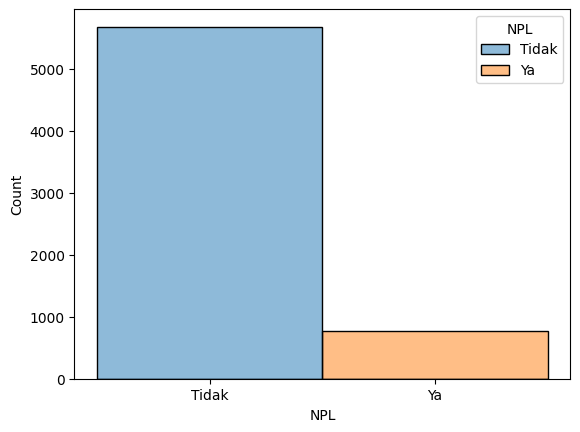

In [30]:
sns.histplot(data = train_set, x = "NPL", hue = "NPL")

### 6.1. Undersampling

In [31]:
def rus_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 26)

    # Balancing set data
    x_rus, y_rus = rus.fit_resample(set_data.drop("NPL", axis = 1), set_data.NPL)

    # Concatenate balanced data
    set_data_rus = pd.concat([x_rus, y_rus], axis = 1)

    # Return balanced data
    return set_data_rus

In [35]:
train_set_rus = rus_fit_resample(train_set)

<Axes: xlabel='NPL', ylabel='Count'>

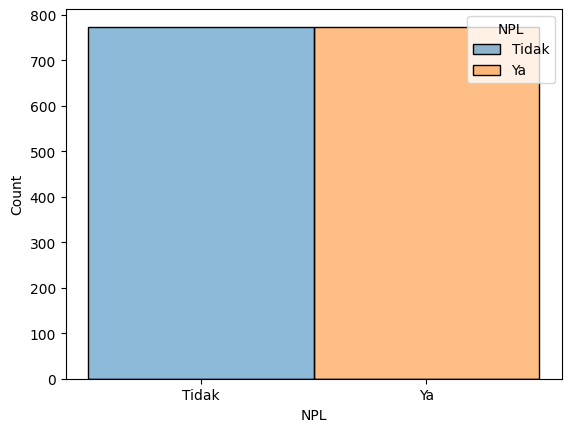

In [36]:
sns.histplot(train_set_rus, x = "NPL", hue = "NPL")

### 6.2. Oversampling

In [37]:
def ros_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 11)

    # Balancing set data
    x_ros, y_ros = ros.fit_resample(set_data.drop("NPL", axis = 1), set_data.NPL)

    # Concatenate balanced data
    set_data_ros = pd.concat([x_ros, y_ros], axis = 1)

    # Return balanced data
    return set_data_ros

In [41]:
train_set_ros = ros_fit_resample(train_set)

<Axes: xlabel='NPL', ylabel='Count'>

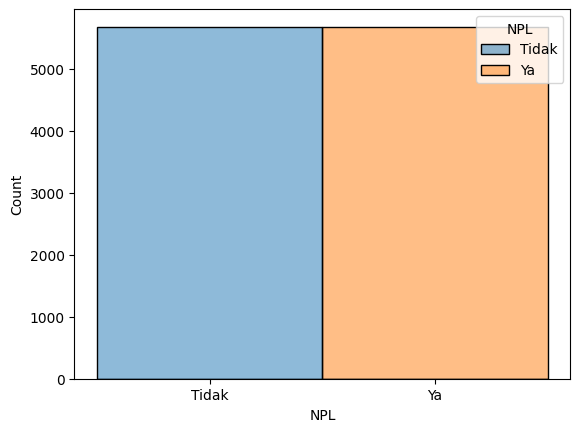

In [42]:
sns.histplot(train_set_ros, x = "NPL", hue = "NPL")

### 6.3. SMOTE

In [43]:
def sm_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    sm = SMOTE(random_state = 112)

    # Balancing set data
    x_sm, y_sm = sm.fit_resample(set_data.drop("NPL", axis = 1), set_data.NPL)

    # Concatenate balanced data
    set_data_sm = pd.concat([x_sm, y_sm], axis = 1)

    # Return balanced data
    return set_data_sm

In [44]:
train_set_sm = sm_fit_resample(train_set)

<Axes: xlabel='NPL', ylabel='Count'>

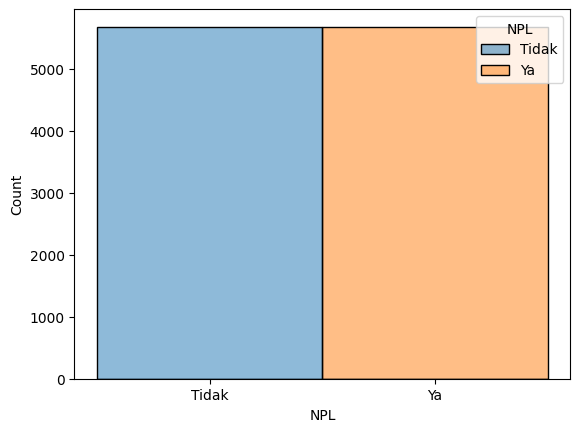

In [46]:
sns.histplot(train_set_sm, x = "NPL", hue = "NPL")

## 7. Label Encoding

### 7.1. Fit LE to Label Data

In [35]:
def le_fit(data_tobe_fitted: dict, le_path: str) -> LabelEncoder:
    # Create le object
    le_encoder = LabelEncoder()

    # Fit le
    le_encoder.fit(data_tobe_fitted)

    # Save le object
    util.pickle_dump(le_encoder, le_path)

    # Return trained le
    return le_encoder

In [48]:
le_encoder = le_fit(config_data["label_categories"], config_data["le_encoder_path"])

In [36]:
def le_transform(label_data: pd.Series, config_data: dict) -> pd.Series:
    # Create copy of label_data
    label_data = label_data.copy()

    # Load le encoder
    le_encoder = util.pickle_load(config_data["le_encoder_path"])

    # If categories both label data and trained le matched
    if len(set(label_data.unique()) - set(le_encoder.classes_) | set(le_encoder.classes_) - set(label_data.unique())) == 0:
        # Transform label data
        label_data = le_encoder.transform(label_data)
    else:
        raise RuntimeError("Check category in label data and label encoder.")
    
    # Return transformed label data
    return label_data


### 7.2. Undersampling set

In [53]:
train_set_rus.NPL = le_transform(train_set_rus.NPL, config_data)


### 7.3. Oversampling set

In [55]:
train_set_ros.NPL = le_transform(train_set_ros.NPL, config_data)

#### 7.4. SMOTE

In [56]:
train_set_sm.NPL = le_transform(train_set_sm.NPL, config_data)

#### 7.4. Validation Set

In [57]:
valid_set.NPL = le_transform(valid_set.NPL, config_data)

#### 7.5. Test Set

In [58]:
test_set.NPL = le_transform(test_set.NPL, config_data)

## 8. Dump Dataset

In [59]:
x_train = {
    "Undersampling" : train_set_rus.drop(columns = "NPL"),
    "Oversampling" : train_set_ros.drop(columns = "NPL"),
    "SMOTE" : train_set_sm.drop(columns = "NPL")
}

y_train = {
    "Undersampling" : train_set_rus.NPL,
    "Oversampling" : train_set_ros.NPL,
    "SMOTE" : train_set_sm.NPL
}

In [61]:
util.pickle_dump(x_train, "data/processed/x_train_feng.pkl")
util.pickle_dump(y_train, "data/processed/y_train_feng.pkl")

util.pickle_dump(valid_set.drop(columns = "NPL"), "data/processed/x_valid_feng.pkl")
util.pickle_dump(valid_set.NPL, "data/processed/y_valid_feng.pkl")

util.pickle_dump(test_set.drop(columns = "NPL"), "data/processed/x_test_feng.pkl")
util.pickle_dump(test_set.NPL, "data/processed/y_test_feng.pkl")